In [1]:
!pip install psycopg2 pandas sqlalchemy


     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------- ----------------- 0.7/1.2 MB 4.6 MB/s eta 0:00:01
     ----------------------------- ---------- 0.9/1.2 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/11.6 MB 14.5 MB/s eta 0:00:01
     -- ------------------------------------- 0.8/11.6 MB 5.0 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 4.2 MB/s et


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# Extracting Data from TAR.GZ Files

file1_path = 'raw_data/compress_drug_files/gdc_download_20241213_111159.408787.tar.gz'
file2_path = 'raw_data/compress_drug_files/gdc_download_20241213_111213.653205.tar.gz'

In [169]:
extracted_dir = 'raw_data/extracted_drug_response_files'
def extract_tar_gz(file_path, output_dir):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_dir, filter=None)
        print(f"Extracted {file_path} to {output_dir}")

In [170]:
def list_all_files_in_directory(directory, file_extension=".txt"):
    """List all files with a specific extension in a directory and its subdirectories."""
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(file_extension):
                full_path = os.path.join(root, file)
                file_paths.append(full_path)
    return file_paths


In [6]:
extract_tar_gz(file1_path, extracted_dir)
extract_tar_gz(file2_path, extracted_dir)


Extracted raw_data/compress_drug_files/gdc_download_20241213_111159.408787.tar.gz to raw_data/extracted_drug_response_files
Extracted raw_data/compress_drug_files/gdc_download_20241213_111213.653205.tar.gz to raw_data/extracted_drug_response_files
Loaded MANIFEST with shape (2, 1)


C:\Users\mawuk\AppData\Local\Temp\ipykernel_14452\2881628237.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=output_dir, filter=None)


In [11]:
output_dir = "raw_data/extracted_drug_response_files"
files = list_all_files_in_directory(output_dir, file_extension=".txt")

print(f"Found {len(files)} files.")
for file_path in files:
    print(file_path)

Found 5 files.
raw_data/extracted_drug_response_files\MANIFEST.txt
raw_data/extracted_drug_response_files\3b0a2c87-68cc-4c4d-8a1c-5a2d8dac2125\annotations.txt
raw_data/extracted_drug_response_files\3b0a2c87-68cc-4c4d-8a1c-5a2d8dac2125\nationwidechildrens.org_clinical_drug_gbm.txt
raw_data/extracted_drug_response_files\c1f6276e-6e34-4c18-b599-88ffe9ad20bc\annotations.txt
raw_data/extracted_drug_response_files\c1f6276e-6e34-4c18-b599-88ffe9ad20bc\nationwidechildrens.org_clinical_drug_lgg.txt


In [133]:
extracted_dir = 'raw_data/extracted_clinical_patient_data'
file1_path = 'raw_data/compressed_clinical_files/gdc_download_20241218_205040.532657.tar.gz'
file2_path = 'raw_data/compressed_clinical_files/gdc_download_20241218_205223.097279.tar.gz'

extract_tar_gz(file1_path, extracted_dir)
extract_tar_gz(file2_path, extracted_dir)

Extracted raw_data/compressed_clinical_files/gdc_download_20241218_205040.532657.tar.gz to raw_data/extracted_clinical_patient_data
Extracted raw_data/compressed_clinical_files/gdc_download_20241218_205223.097279.tar.gz to raw_data/extracted_clinical_patient_data


C:\Users\mawuk\AppData\Local\Temp\ipykernel_14452\2881628237.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=output_dir, filter=None)


In [134]:
output_dir = "raw_data/extracted_clinical_patient_data"
files = list_all_files_in_directory(output_dir, file_extension=".txt")

print(f"Found {len(files)} files.")
for file_path in files:
    print(file_path)

Found 5 files.
raw_data/extracted_clinical_patient_data\MANIFEST.txt
raw_data/extracted_clinical_patient_data\57683e22-a8ea-4eca-bfcf-f708cf459546\annotations.txt
raw_data/extracted_clinical_patient_data\57683e22-a8ea-4eca-bfcf-f708cf459546\nationwidechildrens.org_clinical_patient_gbm.txt
raw_data/extracted_clinical_patient_data\f3a1bc62-9552-4553-b318-7d9c21d21ce7\annotations.txt
raw_data/extracted_clinical_patient_data\f3a1bc62-9552-4553-b318-7d9c21d21ce7\nationwidechildrens.org_clinical_patient_lgg.txt


## GBM DATA

In [6]:
file1_path = "raw_data/extracted_drug_response_files/3b0a2c87-68cc-4c4d-8a1c-5a2d8dac2125/nationwidechildrens.org_clinical_drug_gbm.txt"


In [8]:
df2 = pd.read_csv(file1_path, sep='\t')
df2.shape

(1507, 28)

In [13]:
df2.to_csv('raw_data/extracted_drug_response_files/gbm_drug.csv', index=False)

## Deleted Duplicate Columns Headings Using Excel

In [16]:
drug_response_df = pd.read_csv('raw_data/extracted_drug_response_files/gbm_drug.csv')

In [17]:
drug_response_df.shape

(1505, 28)

In [18]:
drug_response_df.isnull().sum()


bcr_patient_uuid                       0
bcr_patient_barcode                    0
bcr_drug_barcode                       0
bcr_drug_uuid                          0
form_completion_date                   0
pharmaceutical_therapy_drug_name       0
clinical_trial_drug_classification     0
pharmaceutical_therapy_type            0
pharmaceutical_tx_started_days_to      0
pharmaceutical_tx_ongoing_indicator    0
pharmaceutical_tx_ended_days_to        0
treatment_best_response                0
days_to_stem_cell_transplantation      0
pharm_regimen                          0
pharm_regimen_other                    0
pharma_adjuvant_cycles_count           0
pharma_type_other                      0
pharmaceutical_tx_dose_units           0
pharmaceutical_tx_total_dose_units     0
prescribed_dose                        0
regimen_number                         0
route_of_administration                0
stem_cell_transplantation              0
stem_cell_transplantation_type         0
therapy_regimen 

In [19]:
unique_patients = drug_response_df['bcr_patient_uuid'].nunique()
print(f"Number of unique patients (by UUID): {unique_patients}")

Number of unique patients (by UUID): 443


In [20]:
unique_drugs = drug_response_df['pharmaceutical_therapy_drug_name'].nunique()
# print(unique_drugs.shape)
print("\nUnique Drug Names:\n", unique_drugs)


Unique Drug Names:
 232


In [21]:
drug_counts = drug_response_df.groupby('bcr_patient_uuid')['pharmaceutical_therapy_drug_name'].nunique()

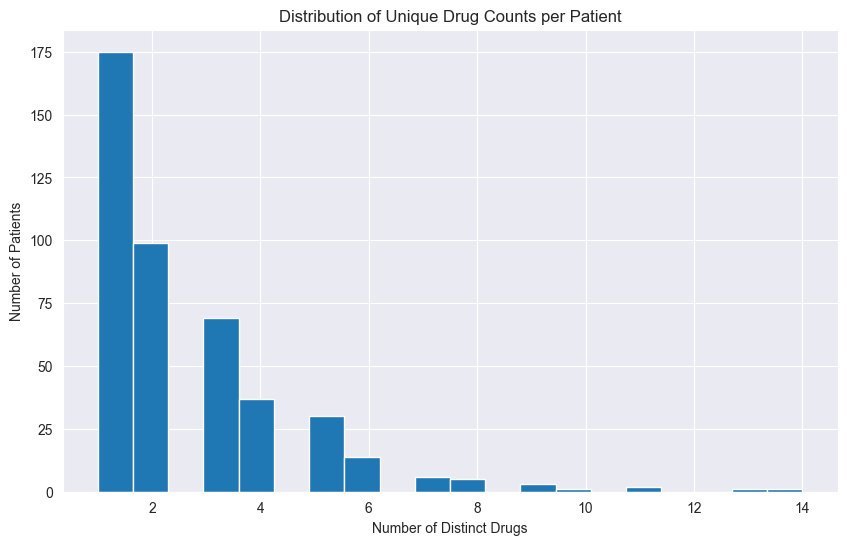

In [23]:
drug_counts.plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Unique Drug Counts per Patient')
plt.xlabel('Number of Distinct Drugs')
plt.ylabel('Number of Patients')
plt.show()

In [24]:
pharmaceutical_therapy_type = drug_response_df['pharmaceutical_therapy_type'].unique()
print(pharmaceutical_therapy_type.shape)
print("\nUnique pharmaceutical therapy type Names:\n", pharmaceutical_therapy_type)

(6,)

Unique pharmaceutical therapy type Names:
 ['Chemotherapy' 'Hormone Therapy' 'Immunotherapy'
 'Targeted Molecular therapy' '[Discrepancy]' '[Not Available]']


# Patient Clinical Data


In [28]:
file1_path = "raw_data/extracted_clinical_patient_data/57683e22-a8ea-4eca-bfcf-f708cf459546/nationwidechildrens.org_clinical_patient_gbm.txt"


df1 = pd.read_csv(file1_path, sep='\t')

In [29]:
print(f"df1 shape{df1.shape} ")

df1 shape(601, 39) 


In [30]:
df1.to_csv('raw_data/extracted_clinical_patient_data/gbm_patient_clinical_df.csv', index=False)

## Deleting Duplicate Attribute Label with Excel

In [31]:
patient_clinical_df = pd.read_csv('raw_data/extracted_clinical_patient_data/gbm_patient_clinical_df.csv')
patient_clinical_df.shape

(599, 39)

In [32]:
unique_patients = patient_clinical_df['bcr_patient_uuid'].nunique()
print(f"Number of unique patients (by UUID): {unique_patients}")

Number of unique patients (by UUID): 599


In [34]:
drug_response_set = set(drug_response_df['bcr_patient_uuid'].unique())
patient_clinical_set = set(patient_clinical_df['bcr_patient_uuid'].unique())

# Step 3: Find the intersection of the two sets of patient IDs
common_patients = drug_response_set.intersection(patient_clinical_set)

# Step 4: Count the number of patients in common
num_common_patients = len(common_patients)

print(f"Number of patients in common: {num_common_patients}")

Number of patients in common: 443


In [35]:
merge_key = 'bcr_patient_uuid'

merged_df = pd.merge(drug_response_df, patient_clinical_df, on=merge_key, how='inner')
print("\nMerged Data Info:")
print(merged_df.info())


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   bcr_patient_uuid                      1505 non-null   object
 1   bcr_patient_barcode_x                 1505 non-null   object
 2   bcr_drug_barcode                      1505 non-null   object
 3   bcr_drug_uuid                         1505 non-null   object
 4   form_completion_date_x                1505 non-null   object
 5   pharmaceutical_therapy_drug_name      1505 non-null   object
 6   clinical_trial_drug_classification    1505 non-null   object
 7   pharmaceutical_therapy_type           1505 non-null   object
 8   pharmaceutical_tx_started_days_to     1505 non-null   object
 9   pharmaceutical_tx_ongoing_indicator   1505 non-null   object
 10  pharmaceutical_tx_ended_days_to       1505 non-null   object
 11  treatment_b

In [36]:
merged_df.to_csv('raw_data/gbm_merged_drug_clinical.csv', index=False)

# Clinical Follow up Data

In [39]:
extracted_dir = 'raw_data/extracted_follow_up_data'
file1_path = 'raw_data/compressed_follow_up_data/gdc_download_20241214_150146.274210.tar.gz'
file2_path = 'raw_data/compressed_follow_up_data/gdc_download_20241214_151521.969251.tar.gz'

extract_tar_gz(file1_path, extracted_dir)
extract_tar_gz(file2_path, extracted_dir)

Extracted raw_data/compressed_follow_up_data/gdc_download_20241214_150146.274210.tar.gz to raw_data/extracted_follow_up_data
Extracted raw_data/compressed_follow_up_data/gdc_download_20241214_151521.969251.tar.gz to raw_data/extracted_follow_up_data


C:\Users\mawuk\AppData\Local\Temp\ipykernel_14452\2881628237.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=output_dir, filter=None)


In [40]:
output_dir = "raw_data/extracted_drug_response_files"
files = list_all_files_in_directory(output_dir, file_extension=".txt")

print(f"Found {len(files)} files.")
for file_path in files:
    print(file_path)

Found 5 files.
raw_data/extracted_drug_response_files\MANIFEST.txt
raw_data/extracted_drug_response_files\3b0a2c87-68cc-4c4d-8a1c-5a2d8dac2125\annotations.txt
raw_data/extracted_drug_response_files\3b0a2c87-68cc-4c4d-8a1c-5a2d8dac2125\nationwidechildrens.org_clinical_drug_gbm.txt
raw_data/extracted_drug_response_files\c1f6276e-6e34-4c18-b599-88ffe9ad20bc\annotations.txt
raw_data/extracted_drug_response_files\c1f6276e-6e34-4c18-b599-88ffe9ad20bc\nationwidechildrens.org_clinical_drug_lgg.txt


In [41]:
file1_path = "raw_data/extracted_follow_up_data/3bba81d3-f253-42ea-b9eb-72bc8641fd69/nationwidechildrens.org_clinical_follow_up_v1.0_lgg.txt"
file2_path = "raw_data/extracted_follow_up_data/c9cdbc76-105d-429b-9fce-f000819716f9/nationwidechildrens.org_clinical_follow_up_v1.0_gbm.txt"
df1 = pd.read_csv(file1_path, sep='\t')
df2 = pd.read_csv(file2_path, sep='\t')


In [42]:
print(f"df1 shape{df1.shape} \ndf2 shape: {df2.shape}")


df1 shape(649, 29) 
df2 shape: (655, 19)


In [47]:
common_columns = df1.keys().intersection(df2.keys())
print("🟢 Common Columns:", common_columns)

🟢 Common Columns: Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_followup_barcode',
       'bcr_followup_uuid', 'form_completion_date', 'followup_reason',
       'followup_lost_to', 'radiation_treatment_adjuvant',
       'pharmaceutical_tx_adjuvant', 'treatment_outcome_first_course',
       'vital_status', 'last_contact_days_to', 'death_days_to', 'tumor_status',
       'new_tumor_event_dx_indicator', 'treatment_outcome_at_tcga_followup',
       'ecog_score', 'karnofsky_score', 'performance_status_timing'],
      dtype='object')


In [48]:
uncommon_columns = df1.keys().symmetric_difference(df2.keys())
print("🟢 Uncommon Columns:", uncommon_columns)

🟢 Uncommon Columns: Index(['days_to_performance_status_assessment', 'new_neoplasm_event_type',
       'new_tumor_event_dx_days_to', 'new_tumor_event_pharmaceutical_tx',
       'new_tumor_event_radiation_tx', 'new_tumor_event_surgery',
       'new_tumor_event_surgery_days_to_loco',
       'new_tumor_event_surgery_days_to_met', 'new_tumor_event_surgery_met',
       'patient_death_reason'],
      dtype='object')


In [49]:
df1 = df1.drop(columns=uncommon_columns)

In [50]:
df_list = [df1, df2]
combined_df = pd.concat(df_list, ignore_index=True)

In [52]:
combined_df.head()
combined_df.to_csv('raw_data/extracted_follow_up_data/combined_follow_up_data.csv', index=False)

## Deleting Duplicate Column Labels Using Excel

In [63]:
follow_up_df = pd.read_csv('raw_data/extracted_follow_up_data/combined_follow_up_data.csv')
follow_up_df.isnull().sum()

bcr_patient_uuid                      0
bcr_patient_barcode                   0
bcr_followup_barcode                  0
bcr_followup_uuid                     0
form_completion_date                  0
followup_reason                       0
followup_lost_to                      0
radiation_treatment_adjuvant          0
pharmaceutical_tx_adjuvant            0
treatment_outcome_first_course        0
vital_status                          0
last_contact_days_to                  0
death_days_to                         0
tumor_status                          0
new_tumor_event_dx_indicator          0
treatment_outcome_at_tcga_followup    0
ecog_score                            0
karnofsky_score                       0
performance_status_timing             0
dtype: int64

In [65]:
not_available_mask = follow_up_df.isin(['[Not Available]'])

# Count how many "[Not Available]" entries are in each column
not_available_counts = not_available_mask.sum()

print("\n[Not Available] counts per column:")
print(not_available_counts)


[Not Available] counts per column:
bcr_patient_uuid                         0
bcr_patient_barcode                      0
bcr_followup_barcode                     0
bcr_followup_uuid                        0
form_completion_date                     0
followup_reason                        683
followup_lost_to                       794
radiation_treatment_adjuvant            77
pharmaceutical_tx_adjuvant             112
treatment_outcome_first_course         674
vital_status                            21
last_contact_days_to                   222
death_days_to                            1
tumor_status                           114
new_tumor_event_dx_indicator           645
treatment_outcome_at_tcga_followup     685
ecog_score                            1207
karnofsky_score                        773
performance_status_timing              840
dtype: int64


In [66]:
follow_up_df.shape

(1300, 19)

In [128]:
print("Unique values in tumor_status column:")
print(follow_up_df['tumor_status'].value_counts())

Unique values in tumor_status column:
tumor_status
WITH TUMOR         904
TUMOR FREE         225
[Not Available]    114
[Unknown]           52
[Discrepancy]        5
Name: count, dtype: int64


## Merging the DFs

In [150]:
merge_key = 'bcr_patient_uuid'

merged_df = pd.merge(drug_response_df, follow_up_df, on=merge_key, how='inner')
print("\nMerged Data Info:")
print(merged_df.info())


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   bcr_patient_uuid                     2898 non-null   object
 1   bcr_patient_barcode_x                2898 non-null   object
 2   bcr_drug_barcode                     2898 non-null   object
 3   bcr_drug_uuid                        2898 non-null   object
 4   form_completion_date_x               2898 non-null   object
 5   pharmaceutical_therapy_drug_name     2898 non-null   object
 6   clinical_trial_drug_classification   2898 non-null   object
 7   pharmaceutical_therapy_type          2898 non-null   object
 8   pharmaceutical_tx_started_days_to    2898 non-null   object
 9   pharmaceutical_tx_ongoing_indicator  2898 non-null   object
 10  pharmaceutical_tx_ended_days_to      2898 non-null   object
 11  treatment_best_response 

In [151]:
merged_df = pd.merge(merged_df, patient_clinical_df, on=merge_key, how='inner')

In [153]:
merged_df.shape

(2898, 79)

In [105]:
merged_df.isin(['[Not Available]']).sum()

bcr_patient_uuid                       0
bcr_patient_barcode_x                  0
bcr_drug_barcode                       0
bcr_drug_uuid                          0
form_completion_date_x                 0
pharmaceutical_therapy_drug_name       0
clinical_trial_drug_classification     0
pharmaceutical_therapy_type            0
pharmaceutical_tx_started_days_to      0
pharmaceutical_tx_ongoing_indicator    0
pharmaceutical_tx_ended_days_to        0
treatment_best_response                0
days_to_stem_cell_transplantation      0
pharm_regimen                          0
pharm_regimen_other                    0
pharma_adjuvant_cycles_count           0
pharma_type_other                      0
pharmaceutical_tx_dose_units           0
pharmaceutical_tx_total_dose_units     0
prescribed_dose                        0
regimen_number                         0
route_of_administration                0
stem_cell_transplantation              0
stem_cell_transplantation_type         0
therapy_regimen 